In [14]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Heterogenous v.s. uniform data distributions

Text(0, 0.5, 'Validation Accuracy')

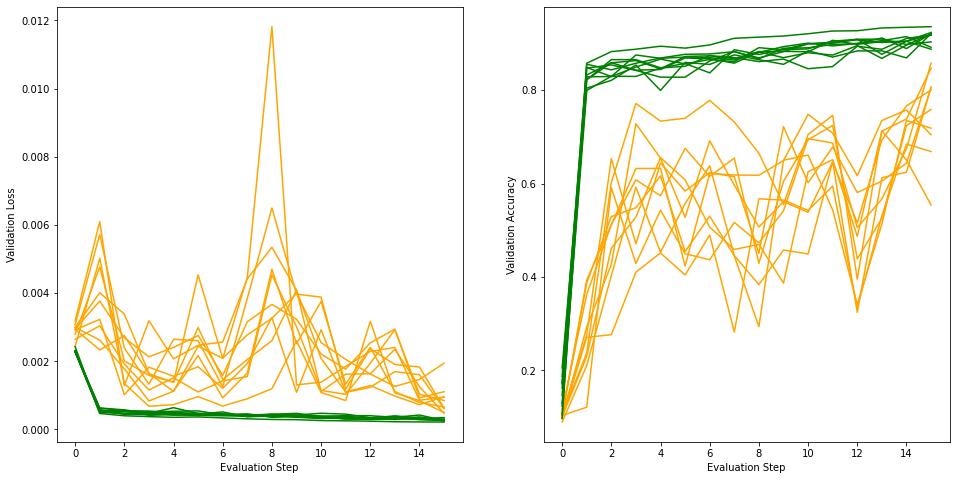

In [18]:
data_dict = torch.load("outputs/hetero_600_5.pt")
obvs_h = data_dict["obj_vals"]
accs_h = data_dict["accuracy"]

data_dict = torch.load("outputs/uniform_600_5.pt")
obvs_u = data_dict["obj_vals"]
accs_u = data_dict["accuracy"]


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax0.plot(obvs_h, c="orange")
ax0.plot(obvs_u, c="green")

ax0.set_xlabel("Evaluation Step")
ax0.set_ylabel("Validation Loss")
ax1.plot(accs_h, c="orange")
ax1.plot(accs_u, c="green")
ax1.set_xlabel("Evaluation Step")
ax1.set_ylabel("Validation Accuracy")

# Experiment Parameters

- BatchSize = 64
- InnerIterations = 5 (the number of gradient descent iterations for the primal update)
- OuterIterations = 600 (the number of communication rounds per run)
- Rho = 1.0
- GDLearningRate = 0.005 (in this case we use Adam)
- GraphType = Wheel

# Observations

- Images processed per node: BatchSize x InnerIterations x OuterIterations = 64 x 5 x 600 = 192,000. This equates to roughly 3.2 passes on the entire dataset of 60,000 images.
- The CNN in use has 37,682 parameters, which equates to roughly 150kb messages.
- For reference, after 1 pass through the dataset when training in the centralized case the model achieves 97% evaluation accuracy.

# Potentially Interesting Questions
- How does scale effect the convergence? Since this is a *small* CNN.
- Can we quantify the data heterogeneity? What does this mean for the gradients? Maybe a first-order gradient tracking DO method is better?

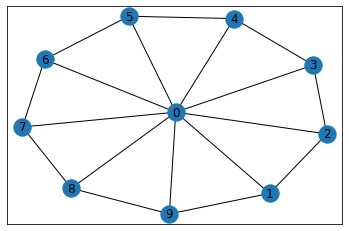

In [21]:
import networkx as nx
nx.draw_networkx(nx.wheel_graph(10))

# Hetero vs Homo MNIST

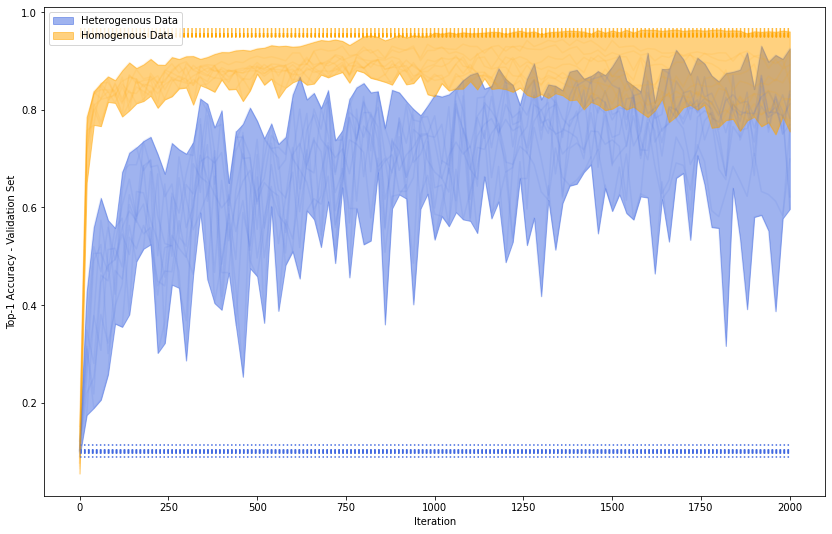

In [47]:
het_dir = "outputs/class_hetero_2021-05-26_12-49-41"
hom_dir = "outputs/class_homo_2021-05-26_11-43-55"

het_sr = torch.load(het_dir + "/soloresults.pt")
hom_sr = torch.load(hom_dir + "/soloresults.pt")

het_dict = torch.load(het_dir + "/dist_class_results.pt")
het_acc = het_dict["accuracy"]
het_accmin = torch.amin(het_acc, dim=1)
het_accmax = torch.amax(het_acc, dim=1)


hom_dict = torch.load(hom_dir + "/dist_class_results.pt")
hom_acc = hom_dict["accuracy"]

hom_accmin = torch.amin(hom_acc, dim=1)
hom_accmax = torch.amax(hom_acc, dim=1)

x = 20 * np.arange(hom_acc.shape[0])

fig, ax = plt.subplots(figsize=(14, 9))

ax.fill_between(x, het_accmin, het_accmax, alpha=0.5, label="Heterogenous Data", color="royalblue")
ax.plot(x, het_acc, color="royalblue", alpha=0.1)
ax.fill_between(x, hom_accmin, hom_accmax, color="orange", alpha=0.5, label="Homogenous Data")
ax.plot(x, hom_acc, c="orange", alpha=0.1)
ax.hlines(hom_sr[:, 1] / 10000, 0, 2000, linestyles="dotted", color="orange")
ax.hlines(het_sr[:, 1] / 10000, 0, 2000, linestyles="dotted", color="royalblue")
ax.set_xlabel("Iteration")
ax.set_ylabel("Top-1 Accuracy - Validation Set")
ax.legend()